In [1]:
!pip install mne

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import signal
from scipy.fft import fftshift
import math
import mne
base_dir = os.getcwd()
print(f'current directory: {base_dir}')

dataset_dir = os.path.join(base_dir, 'datasets')
print(f'datasets directory: {dataset_dir}')
def read_A_dataset(path, case_str):
  case_path = os.path.join(path, case_str)
  subjects_list = []
  for filename in os.listdir(case_path):
    with open(os.path.join(case_path, filename), 'r') as f:
      lines = f.readlines()
      subjects_list.append(lines)
  return subjects_list

# -----------------------------------------
def convert_to_numbers(sub_list):
  new_list = []
  for sub in sub_list:
    new_list.append([float(value) for value in sub])
  return new_list

# -----------------------------------------
def list_segments(lst, segments=16):
  arr = np.array(lst)
  return np.array_split(np.array(arr), segments)


# --------------------------------------------
def divide_to_channels(subjects_list, segments=16):
  return [list_segments(subject, segments) for subject in subjects_list]


# ----------------------------------------------
def log_data_shapes(sch, norm):
  return {
 'sch': (len(sch), len(sch[0]), sch[0][0].shape),
 'norm': (len(norm), len(norm[0]), norm[0][0].shape)}

# --------------------------------------------------
def divide_time_segments(subject_list, time_window=5):
  n_segments = total_time // time_window
  return [np.split(channel, n_segments) for channel in subject_list]


# -----------------------------------------------
def create_spectrogram_data(subject_list):
  new_subject_list = []
  for subject in subject_list:
    specs = []
    segment_channels = divide_time_segments(subject)
    array_of_arrays = np.array([np.array(channel) for channel in segment_channels])
    for i in range(0, array_of_arrays.shape[1]):
      spec_data = np.squeeze(array_of_arrays[:, i, :].reshape((1, -1)))
      specs.append(spec_data)
    new_subject_list.append(specs)
  return new_subject_list

colors = ['black', 'darkorange', 'blue', 'red', 'cyan', 'limegreen', 'dodgerblue', 'violet', 'slateblue', 'yellow',
          'black', 'darkorange', 'blue', 'red', 'cyan', 'limegreen', 'dodgerblue', 'violet', 'slateblue', 'yellow']

channels_16 = ['F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
               'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']

def plot_signals(data, subject_index=0, n_channels=16):
  fig = plt.figure(figsize=(20, 10), dpi=85)
  gs = gridspec.GridSpec(n_channels, 1)

  for i in range(0, n_channels):
    ax = plt.subplot(gs[i])
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    line, = ax.plot(data[subject_index][i], color=colors[i])
    ax.set_yticklabels([])
    ax.set_ylabel(f'{channels_16[i]}')
    plt.xlim([0, recording_len])

  # remove vertical gap between subplots
  plt.subplots_adjust(hspace=.0)
  plt.show()



def create_spectrogram(data, fs, impath= '', save=False):
  plt.specgram(data, Fs=fs, NFFT=1024)
  if save:
    plt.axis('off')
    plt.savefig(impath, dpi=300, pad_inches=0.0, transparent=True, bbox_inches='tight')
  else: plt.show()


current directory: /Users/delphia/Desktop/final_project
datasets directory: /Users/delphia/Desktop/final_project/datasets


In [14]:
# if 'google.colab' in str(get_ipython()):
#  os.chdir('/content/drive/MyDrive/Colab Notebooks/EEG_SHCEEEZ-DL')



current directory: /Users/delphia/Desktop/final_project
datasets directory: /Users/delphia/Desktop/final_project/datasets


####**Utility plotting functions**

In [2]:
recording_len = 7680
freq = 128
total_time = recording_len // freq
print(f'the recording is {total_time} seconds long and has total {recording_len} values')


norm_raw_data = convert_to_numbers(read_A_dataset(os.path.join(dataset_dir, ''), 'norm'))
sch_raw_data = convert_to_numbers(read_A_dataset(os.path.join(dataset_dir, ''), 'sch'))
print(f'no. subjects = norm: {len(norm_raw_data)}, sch:{len(sch_raw_data)}')

sch_channels = divide_to_channels(sch_raw_data)
norm_channels = divide_to_channels(norm_raw_data)

the recording is 60 seconds long and has total 7680 values
no. subjects = norm: 39, sch:45


In [3]:
np.shape(sch_raw_data)

(45, 122880)

In [4]:


print('shapes: ', log_data_shapes(sch_channels, norm_channels))

norm_data = norm_channels
sch_data = sch_channels

norm_specgram_data = create_spectrogram_data(norm_data)
sch_specgram_data = create_spectrogram_data(sch_data)

print('\nspectrogram data shapes: ',log_data_shapes(sch_specgram_data, norm_specgram_data))

shapes:  {'sch': (45, 16, (7680,)), 'norm': (39, 16, (7680,))}

spectrogram data shapes:  {'sch': (45, 12, (10240,)), 'norm': (39, 12, (10240,))}


In [6]:
np.shape(sch_channels)

(45, 16, 7680)


16 channel plot of one schizophernic subject


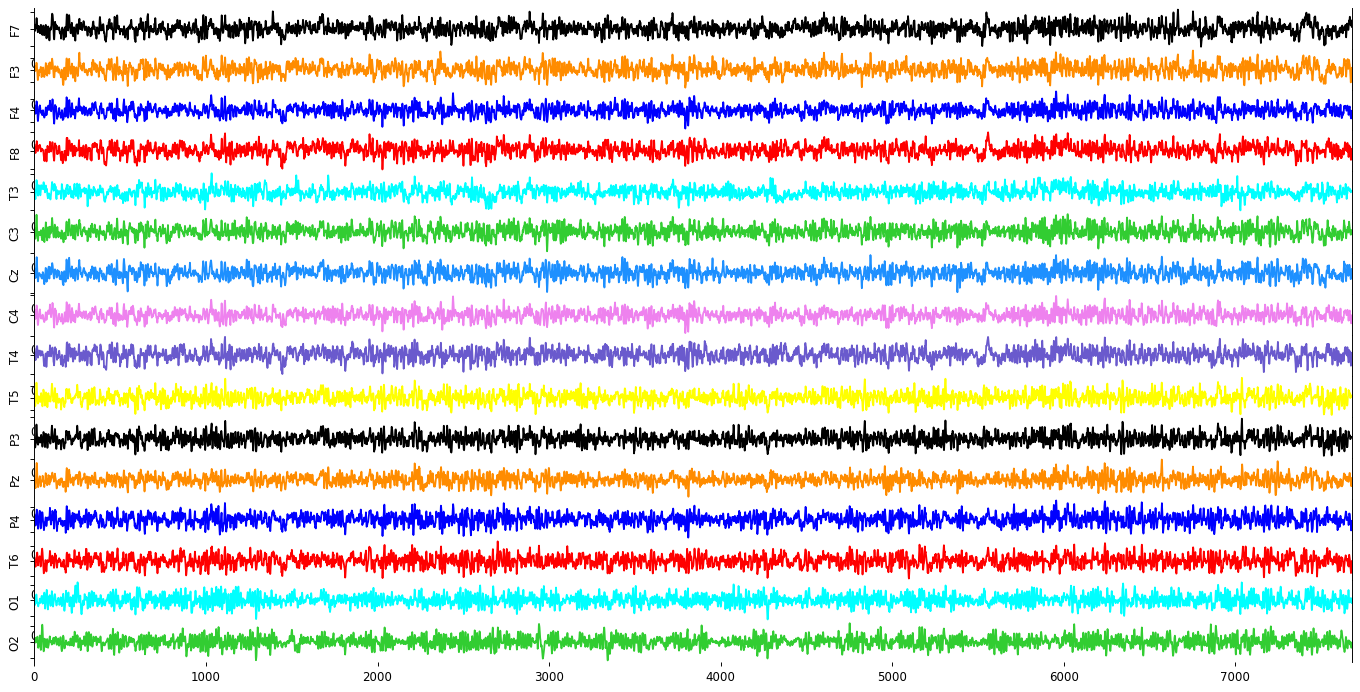

In [9]:
print("\n16 channel plot of one schizophernic subject")
plot_signals(sch_data, 0)


16 channel plot of one healthy subject 


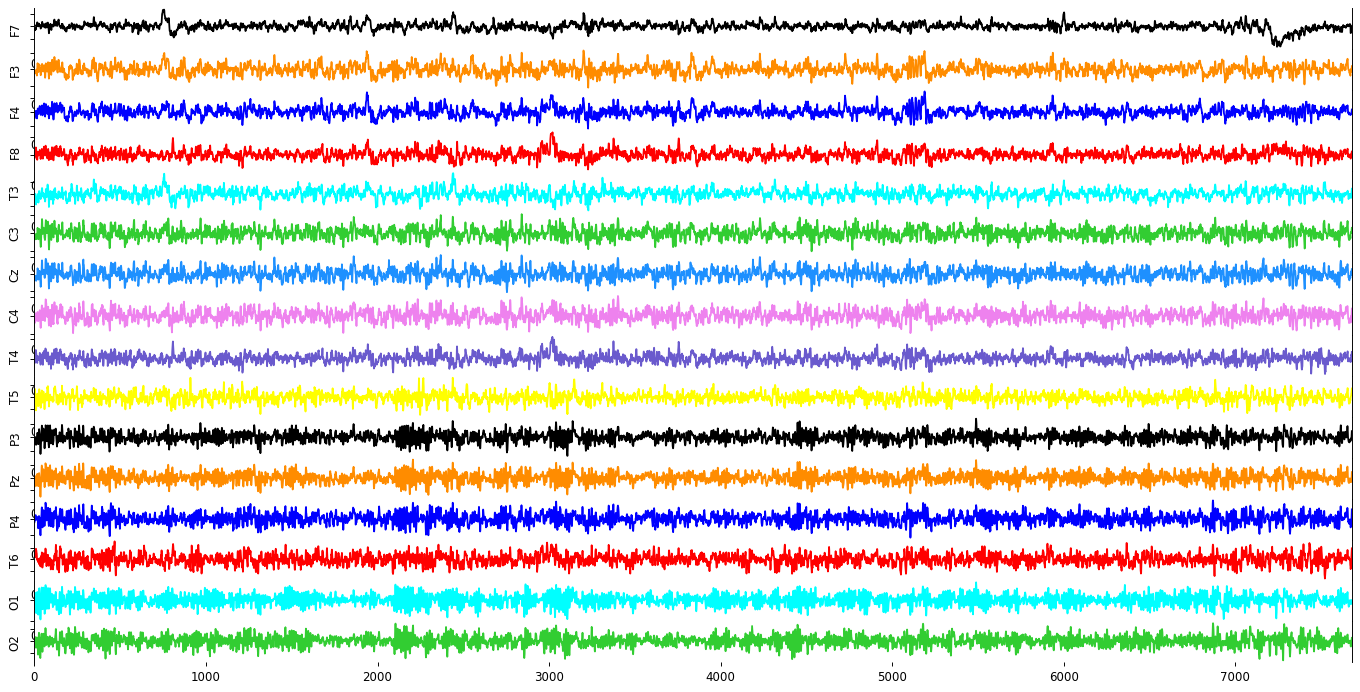

In [10]:
print("\n16 channel plot of one healthy subject ")
plot_signals(norm_data, 2)

In [16]:
np.shape(sch_specgram_data)

(45, 12, 10240)

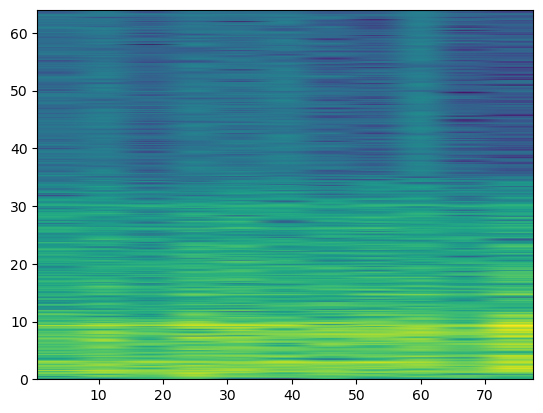

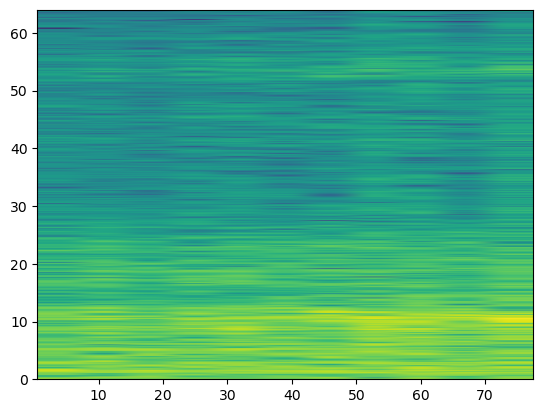

In [11]:
create_spectrogram(sch_specgram_data[0][0], fs=freq)
create_spectrogram(norm_specgram_data[0][0], fs=freq)

In [12]:
cwd = os.getcwd()
print(cwd)

def generate_images_for_subject(path, subject_data, sub_index):
  for i, segment in enumerate(subject_data):
    filename = f'sub{sub_index}-seg{i}'
    print('generated: ', filename)
    create_spectrogram(segment, fs=freq, impath=os.path.join(path, filename), save=True)


def generate_images(data, path, start=0, end=0):
  if(end == 0 or end > len(data)):
    end = len(data)
  if not os.path.exists(os.path.join(cwd, path)):
    os.mkdir(path)
  for i in range(start, end):
    generate_images_for_subject(path, data[i], i)


/Users/delphia/Desktop/final_project


In [19]:
os.mkdir(os.path.join(cwd, "12_segmentation"))

In [20]:
output_path = os.path.join(cwd, "12_segmentation")

generated:  sub10-seg0
generated:  sub10-seg1
generated:  sub10-seg2
generated:  sub10-seg3
generated:  sub10-seg4
generated:  sub10-seg5
generated:  sub10-seg6
generated:  sub10-seg7
generated:  sub10-seg8
generated:  sub10-seg9
generated:  sub10-seg10
generated:  sub10-seg11
generated:  sub11-seg0
generated:  sub11-seg1
generated:  sub11-seg2
generated:  sub11-seg3
generated:  sub11-seg4
generated:  sub11-seg5
generated:  sub11-seg6
generated:  sub11-seg7
generated:  sub11-seg8
generated:  sub11-seg9
generated:  sub11-seg10
generated:  sub11-seg11
generated:  sub12-seg0
generated:  sub12-seg1
generated:  sub12-seg2
generated:  sub12-seg3
generated:  sub12-seg4
generated:  sub12-seg5
generated:  sub12-seg6
generated:  sub12-seg7
generated:  sub12-seg8
generated:  sub12-seg9
generated:  sub12-seg10
generated:  sub12-seg11
generated:  sub13-seg0
generated:  sub13-seg1
generated:  sub13-seg2
generated:  sub13-seg3
generated:  sub13-seg4
generated:  sub13-seg5
generated:  sub13-seg6
gener

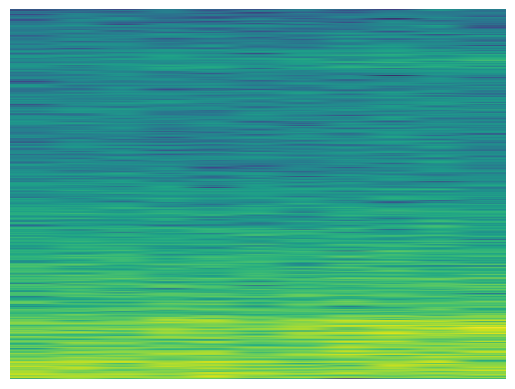

In [21]:
generate_images(sch_specgram_data, os.path.join(output_path, 'sch'), start=10, end=35)

generated:  sub10-seg0
generated:  sub10-seg1
generated:  sub10-seg2
generated:  sub10-seg3
generated:  sub10-seg4
generated:  sub10-seg5
generated:  sub10-seg6
generated:  sub10-seg7
generated:  sub10-seg8
generated:  sub10-seg9
generated:  sub10-seg10
generated:  sub10-seg11
generated:  sub11-seg0
generated:  sub11-seg1
generated:  sub11-seg2
generated:  sub11-seg3
generated:  sub11-seg4
generated:  sub11-seg5
generated:  sub11-seg6
generated:  sub11-seg7
generated:  sub11-seg8
generated:  sub11-seg9
generated:  sub11-seg10
generated:  sub11-seg11
generated:  sub12-seg0
generated:  sub12-seg1
generated:  sub12-seg2
generated:  sub12-seg3
generated:  sub12-seg4
generated:  sub12-seg5
generated:  sub12-seg6
generated:  sub12-seg7
generated:  sub12-seg8
generated:  sub12-seg9
generated:  sub12-seg10
generated:  sub12-seg11
generated:  sub13-seg0
generated:  sub13-seg1
generated:  sub13-seg2
generated:  sub13-seg3
generated:  sub13-seg4
generated:  sub13-seg5
generated:  sub13-seg6
gener

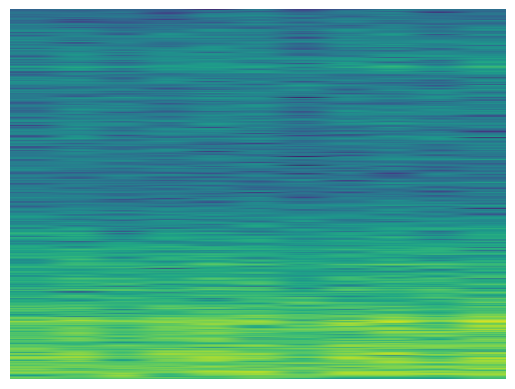

In [22]:
generate_images(norm_specgram_data, os.path.join(output_path, 'norm'), start=10, end=28)

In [16]:
recording_len = 7680
freq = 128
total_time = recording_len // freq
print(f'the recording is {total_time} seconds long and has total {recording_len} values')


norm_raw_data = convert_to_numbers(read_A_dataset(os.path.join(dataset_dir, ''), 'norm'))
sch_raw_data = convert_to_numbers(read_A_dataset(os.path.join(dataset_dir, ''), 'sch'))
print(f'no. subjects = norm: {len(norm_raw_data)}, sch:{len(sch_raw_data)}')

sch_channels = divide_to_channels(sch_raw_data)
norm_channels = divide_to_channels(norm_raw_data)

the recording is 60 seconds long and has total 7680 values
no. subjects = norm: 39, sch:45


In [43]:
print(np.shape(sch_channels))
print(type(sch_channels))

(45, 16, 7680)
<class 'list'>


In [ ]:
import numpy as np
import pandas as pd
from eeglib import features
from scipy import signal
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Print type of sch_channels to confirm
print(type(sch_channels))  # <class 'list'>

# Calculate window parameters
sampling_rate = 128  # 7680 samples ÷ 60 seconds = 128 Hz
window_size = 2 * sampling_rate  # 2 seconds = 256 samples
n_windows = 7680 // window_size  # 30 windows
n_subjects = len(sch_channels)
n_channels = len(sch_channels[0])  # Assuming first dimension is subjects, second is channels

print(f"Sampling rate: {sampling_rate} Hz")
print(f"Window size: {window_size} samples ({window_size/sampling_rate} seconds)")
print(f"Number of windows: {n_windows}")
print(f"Number of subjects: {n_subjects}")
print(f"Number of channels: {n_channels}")

# Function to extract features
def extract_features(subject_data):
    # Dictionary to store all features
    all_features = {}
    
    # Process each channel
    for ch in range(len(subject_data)):
        channel_data = subject_data[ch]
        
        # For each window
        for w in range(n_windows):
            window_data = channel_data[w*window_size:(w+1)*window_size]
            window_key = f"window_{w+1}"
            
            # 1. AR Coefficients (order 4)
            try:
                # Fit AR model of order 4
                ar_model = sm.tsa.AutoReg(window_data, lags=2).fit()
                # Get the AR coefficients
                ar_coeffs = ar_model.params[1:]  # Skip the constant term
                
                # Store AR coefficients
                for i, coef in enumerate(ar_coeffs):
                    if f"AR{i+1}_ch{ch+1}" not in all_features:
                        all_features[f"AR{i+1}_ch{ch+1}"] = {}
                    all_features[f"AR{i+1}_ch{ch+1}"][window_key] = coef
            except:
                for i in range(4):
                    if f"AR{i+1}_ch{ch+1}" not in all_features:
                        all_features[f"AR{i+1}_ch{ch+1}"] = {}
                    all_features[f"AR{i+1}_ch{ch+1}"][window_key] = np.nan
            
            # 2. Band power
            try:
                # Calculate power spectral density
                f, psd = signal.welch(window_data, sampling_rate, nperseg=window_size)
                
                # Calculate band powers
                delta_idx = np.logical_and(f >= 0.5, f <= 4)
                theta_idx = np.logical_and(f >= 4, f <= 8)
                alpha_idx = np.logical_and(f >= 8, f <= 13)
                beta_idx = np.logical_and(f >= 13, f <= 30)
                
                delta_power = np.sum(psd[delta_idx])
                theta_power = np.sum(psd[theta_idx])
                alpha_power = np.sum(psd[alpha_idx])
                beta_power = np.sum(psd[beta_idx])
                
                # Store band powers
                if f"Delta_ch{ch+1}" not in all_features:
                    all_features[f"Delta_ch{ch+1}"] = {}
                all_features[f"Delta_ch{ch+1}"][window_key] = delta_power
                
                if f"Theta_ch{ch+1}" not in all_features:
                    all_features[f"Theta_ch{ch+1}"] = {}
                all_features[f"Theta_ch{ch+1}"][window_key] = theta_power
                
                if f"Alpha_ch{ch+1}" not in all_features:
                    all_features[f"Alpha_ch{ch+1}"] = {}
                all_features[f"Alpha_ch{ch+1}"][window_key] = alpha_power
                
                if f"Beta_ch{ch+1}" not in all_features:
                    all_features[f"Beta_ch{ch+1}"] = {}
                all_features[f"Beta_ch{ch+1}"][window_key] = beta_power
            except:
                for band in ["Delta", "Theta", "Alpha", "Beta"]:
                    if f"{band}_ch{ch+1}" not in all_features:
                        all_features[f"{band}_ch{ch+1}"] = {}
                    all_features[f"{band}_ch{ch+1}"][window_key] = np.nan
            
            # 3. Fractal dimension (Higuchi)
            try:
                hfd = features.HFD(window_data)
                
                if f"HFD_ch{ch+1}" not in all_features:
                    all_features[f"HFD_ch{ch+1}"] = {}
                all_features[f"HFD_ch{ch+1}"][window_key] = hfd
            except:
                if f"HFD_ch{ch+1}" not in all_features:
                    all_features[f"HFD_ch{ch+1}"] = {}
                all_features[f"HFD_ch{ch+1}"][window_key] = np.nan
    
    # Convert to DataFrame with windows as rows
    df_windows = pd.DataFrame({key: list(values.values()) for key, values in all_features.items()})
    
    # Calculate summary statistics across windows
    df_summary = pd.DataFrame()
    for col in df_windows.columns:
        df_summary[f"{col}_mean"] = [df_windows[col].mean()]
        df_summary[f"{col}_std"] = [df_windows[col].std()]
    
    return df_windows, df_summary

# Process one subject as a test
subject_idx = 0
print(f"Processing subject {subject_idx}...")

# Get subject data
subject_data = sch_channels[subject_idx]

# Extract features
df_windows, df_summary = extract_features(subject_data)

# Save to CSV
df_windows.to_csv(f"subject{subject_idx}_windows_features.csv", index=False)
df_summary.to_csv(f"subject{subject_idx}_summary_features.csv", index=False)

print(f"Window features shape: {df_windows.shape}")
print(f"Summary features shape: {df_summary.shape}")

# Display first few rows and columns of window features
print("\nFirst few window features:")
print(df_windows.iloc[:5, :5])

# Display summary features
print("\nSummary features (first 5 columns):")
print(df_summary.iloc[:, :5])

# Function to process all subjects
def process_all_subjects(channels_data, output_file="all_subjects_features.csv"):
    all_subjects_summary = []
    
    for subject_idx in range(len(channels_data)):
        print(f"Processing subject {subject_idx}...")
        subject_data = channels_data[subject_idx]
        _, subject_summary = extract_features(subject_data)
        subject_summary['subject_id'] = subject_idx
        all_subjects_summary.append(subject_summary)
    
    # Combine all subjects
    all_df = pd.concat(all_subjects_summary, ignore_index=True)
    all_df.to_csv(output_file, index=False)
    print(f"Saved features for all {len(channels_data)} subjects to {output_file}")
    return all_df

# Uncomment to process all subjects
# all_subjects_df = process_all_subjects(sch_channels, "sch_all_features.csv")

In [53]:
print(df_windows.shape)

(30, 144)


In [67]:
import numpy as np
from scipy import signal
from sklearn.decomposition import PCA
import pywt

def extract_eeg_features(data, method='welch', sampling_rate=128):
    """Extract 49 PSD features from EEG data using specified method"""
    if not isinstance(data, list):
        data = [data]
    
    features = []
    n_channels = len(data)
    segment_length = 12 * sampling_rate  # 5 segments of 12s each
    
    for ch in range(n_channels):
        channel_data = np.array(data[ch])
        
        for i in range(5):
            start = i * segment_length
            end = start + segment_length
            
            if end <= len(channel_data):
                # Extract segment
                segment = channel_data[start:end]
                
                # Apply MSPCA denoising
                denoised_segment = apply_mspca(segment)
                
                # Extract PSD features using the specified method
                if method == 'periodogram':
                    f, psd = signal.periodogram(denoised_segment, fs=sampling_rate)
                elif method == 'welch':
                    f, psd = signal.welch(denoised_segment, fs=sampling_rate, nperseg=256)
                elif method == 'multitaper':
                    f, psd = multitaper_psd(denoised_segment, fs=sampling_rate)
                else:
                    raise ValueError("Method must be 'periodogram', 'welch', or 'multitaper'")
                
                # Select frequencies between 1-49 Hz
                mask = (f >= 1) & (f <= 49)
                f_selected = f[mask]
                psd_selected = psd[mask]
                
                # Ensure exactly 49 features
                target_freqs = np.linspace(1, 49, 49)
                psd_features = np.interp(target_freqs, f_selected, psd_selected)
                
                features.append(psd_features)
    
    return np.array(features)

def multitaper_psd(data, fs=128, NW=4, k=7):
    """Simplified multitaper PSD estimation using DPSS windows"""
    # Generate DPSS windows
    n = len(data)
    dpss_windows, _ = signal.windows.dpss(n, NW, k, return_ratios=True)
    
    # Initialize PSD
    freq = np.fft.rfftfreq(n, d=1/fs)
    psd = np.zeros(len(freq))
    
    # Calculate weighted periodograms
    for i in range(k):
        # Apply window
        windowed_data = data * dpss_windows[i]
        
        # Calculate periodogram
        fft_data = np.fft.rfft(windowed_data)
        psd_window = np.abs(fft_data)**2 / (fs * n)
        
        # Add to total
        psd += psd_window
    
    # Average the periodograms
    psd /= k
    
    return freq, psd

def apply_mspca(signal_data):
    """Apply Multiscale Principal Component Analysis for denoising"""
    # Step 1: Wavelet decomposition
    wavelet = 'db4'  # Daubechies wavelet
    
    # Make sure we have enough data points for the desired decomposition level
    level = min(4, pywt.dwt_max_level(len(signal_data), pywt.Wavelet(wavelet).dec_len))
    
    coeffs = pywt.wavedec(signal_data, wavelet, level=level)
    
    # Step 2: Apply PCA to each wavelet coefficient level
    for i in range(1, len(coeffs)):
        coeff = coeffs[i]
        if len(coeff) >= 3:  # Need at least a few samples for PCA
            # Reshape for PCA
            coeff_matrix = coeff.reshape(-1, 1)
            
            # Apply PCA
            pca = PCA(n_components=0.95)  # Keep 95% of variance
            pca.fit(coeff_matrix)
            
            # Transform and inverse transform
            coeff_denoised = pca.inverse_transform(pca.transform(coeff_matrix))
            
            # Update coefficients
            coeffs[i] = coeff_denoised.flatten()[:len(coeff)]
    
    # Step 3: Reconstruct signal
    denoised_signal = pywt.waverec(coeffs, wavelet)
    
    # Trim to original length
    denoised_signal = denoised_signal[:len(signal_data)]
    
    return denoised_signal

In [72]:
def process_all_datasets(sch_channels, norm_channels, method='multitaper'):
    """
    Process all subjects in both schizophrenia and normal datasets
    
    Parameters:
    - sch_channels: List of schizophrenia subjects' EEG data
    - norm_channels: List of normal subjects' EEG data
    - method: Feature extraction method ('periodogram', 'welch', or 'multitaper')
    
    Returns:
    - X: Combined feature matrix
    - y: Labels (1 for schizophrenia, 0 for normal)
    """
    all_features = []
    all_labels = []
    
    # Process schizophrenia subjects
    for subject_data in sch_channels:
        features = extract_eeg_features(subject_data, method=method)
        all_features.append(features)
        # Create labels (1 for schizophrenia)
        all_labels.extend([1] * features.shape[0])
    
    # Process normal subjects
    for subject_data in norm_channels:
        features = extract_eeg_features(subject_data, method=method)
        all_features.append(features)
        # Create labels (0 for normal)
        all_labels.extend([0] * features.shape[0])
    
    # Combine all features
    X = np.vstack(all_features)
    y = np.array(all_labels)
    
    return X, y

# Extract features using multitaper method for all subjects
X, y = process_all_datasets(sch_channels, norm_channels, method='multitaper')
print(f"Combined features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class distribution: {np.bincount(y)}")

Combined features shape: (6720, 49)
Labels shape: (6720,)
Class distribution: [3120 3600]


In [74]:
# Convert features to DataFrame
# Create column names for each frequency (1Hz to 49Hz)
feature_columns = [f'freq_{i+1}Hz' for i in range(49)]
X_df = pd.DataFrame(X, columns=feature_columns)

# Add labels column
X_df['label'] = y

# Save as CSV
X_df.to_csv('eeg_features_multitaper.csv', index=False)

print("Data saved successfully as CSV!")

Data saved successfully as CSV!


In [83]:
X_df[X_df['label'] == 1]

,freq_1Hz,freq_2Hz,freq_3Hz,freq_4Hz,freq_5Hz,freq_6Hz,freq_7Hz,freq_8Hz,freq_9Hz,freq_10Hz,...,freq_41Hz,freq_42Hz,freq_43Hz,freq_44Hz,freq_45Hz,freq_46Hz,freq_47Hz,freq_48Hz,freq_49Hz,label
0,2.450302,1.948729,5.736855,1.513803,1.172932,2.162956,1.595842,2.181605,7.342741,0.875727,...,0.000613,0.000512,0.001233,0.000576,0.000836,0.000643,0.000651,0.000524,0.000840,1
1,2.929404,1.808112,1.856710,1.710199,1.244738,3.299060,2.631883,1.776920,4.262009,1.092450,...,0.001104,0.002129,0.001663,0.001772,0.001193,0.000568,0.001083,0.000758,0.001093,1
2,1.574188,2.867403,2.212131,1.165101,1.166179,2.321252,0.717701,1.532386,6.149807,1.814591,...,0.000911,0.001795,0.001450,0.001902,0.001042,0.000598,0.002269,0.002327,0.000641,1
3,2.400912,2.422400,2.211139,1.851941,1.017222,4.054790,0.937036,1.940732,5.351839,0.723431,...,0.001570,0.001160,0.000848,0.000985,0.000735,0.000690,0.001158,0.001645,0.000661,1
4,5.627238,1.240485,2.117997,1.578291,3.626099,5.170503,2.260473,1.062945,5.808067,1.394110,...,0.002342,0.002132,0.001738,0.002822,0.001547,0.001333,0.001047,0.001960,0.002336,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,5.937362,15.452065,8.638209,2.710413,3.925601,4.530064,2.236094,6.606741,4.605061,15.131426,...,0.004971,0.009278,0.006864,0.012976,0.010528,0.020363,0.005459,0.014679,0.017412,1
3596,14.757946,15.773016,21.562057,2.997451,4.959823,2.518854,3.148778,4.867667,8.939009,10.767957,...,0.005075,0.010789,0.015435,0.004196,0.009341,0.014043,0.006130,0.023347,0.009919,1
3597,8.815770,5.930923,12.547604,1.883934,3.065299,2.904040,2.001018,2.599265,4.435638,7.972968,...,0.011665,0.006384,0.011270,0.012948,0.010698,0.006187,0.011128,0.010036,0.007920,1
3598,9.116163,18.252164,21.901165,3.009428,4.735064,3.991918,3.468276,6.568208,4.966451,23.348757,...,0.007384,0.012918,0.013160,0.005628,0.002268,0.019383,0.012551,0.020295,0.013387,1


In [7]:
np.shape(sch_channels)

(45, 16, 7680)

In [9]:
np.shape(norm_channels)
print(type(sch_channels))

<class 'list'>


In [45]:
segment_duration = 6  # in seconds
sampling_rate = 128
samples_per_segment = segment_duration * sampling_rate  # 25 * 128 = 3200
samples_per_segment

768

In [46]:
import numpy as np

def segment_eeg(eeg_data, segment_size):
    # eeg_data: (n_samples, n_channels, n_timepoints)
    eeg_data = np.array(eeg_data) 
    segments = []
    for sample in eeg_data:
        n_segments = sample.shape[1] // segment_size
        for i in range(n_segments):
            seg = sample[:, i*segment_size:(i+1)*segment_size]
            segments.append(seg)
    return np.array(segments)

In [47]:
sch_segments = segment_eeg(sch_channels, segment_size=samples_per_segment)  
print(sch_segments.shape)  # should be (num_segments, 16, 3200)

(450, 16, 768)


In [48]:
norm_segments = segment_eeg(norm_channels, segment_size=samples_per_segment)  
print(norm_segments.shape)

(390, 16, 768)


In [50]:
from sklearn.preprocessing import StandardScaler, normalize

def normalize_segments(segments):
    # segments: (n_segments, n_channels, n_timepoints)
    normalized = []

    for seg in segments:
        # Z-score normalize across timepoints per channel
        scaler = StandardScaler()
        zscored = scaler.fit_transform(seg.T).T  # shape stays (channels, time)

        # L2 normalize the flattened segment
        flat = zscored.flatten()
        l2normed = normalize(flat.reshape(1, -1), norm='l2').reshape(seg.shape)

        normalized.append(l2normed)

    return np.array(normalized)


def normalize_segments(segments):
    normalized = []
    for seg in segments:
        # Z-score normalize across timepoints per channel
        scaler = StandardScaler()
        zscored = scaler.fit_transform(seg.T).T

        # L2 normalize per channel
        l2normed = np.array([
            normalize(channel.reshape(1, -1), norm='l2')[0] 
            for channel in zscored
        ])

        normalized.append(l2normed)
    return np.array(normalized)

sch_normalized = normalize_segments(sch_segments)
norm_normalized = normalize_segments(norm_segments)

print(sch_normalized.shape)
print(norm_normalized.shape)

(450, 16, 768)
(390, 16, 768)


In [51]:
import numpy as np

# Labels: 1 for schizophrenia, 0 for normal
X = np.concatenate([sch_normalized, norm_normalized], axis=0)
y = np.array([1]*len(sch_normalized) + [0]*len(norm_normalized))
np.savez_compressed("eeg_cv_dataset_L2_6s.npz", X=X, y=y)

In [36]:
from sklearn.model_selection import train_test_split

# First split: train_val vs test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42)

# Then split: train vs val (0.15 / 0.85 ≈ 0.176)
val_ratio_within_trainval = 0.15 / (0.7 + 0.15)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=val_ratio_within_trainval, stratify=y_train_val, random_state=42)


In [37]:
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_val))
print(np.shape(y_test))

(1175, 16, 384)
(253, 16, 384)
(252, 16, 384)
(1175,)
(253,)
(252,)


In [29]:
np.savez_compressed("eeg_dataset.npz",
                    X_train=X_train, y_train=y_train,
                    X_val=X_val, y_val=y_val,
                    X_test=X_test, y_test=y_test)